In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
import numpy as np
import tensorflow as tf

%matplotlib notebook

/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Obtenemos los datos

In [2]:
DF = pd.read_csv('USD_JPY_M5.csv', index_col=0)

In [3]:
DF = DF[150:]

In [4]:
DF.head()

closeAsk  closeBid  complete  highAsk  highBid   lowAsk   lowBid  openAsk  \
82   111.460   111.440      True  111.475  111.455  111.450  111.430  111.460   
83   111.460   111.440      True  111.495  111.475  111.456  111.436  111.465   
84   111.485   111.465      True  111.485  111.465  111.450  111.430  111.460   
85   111.542   111.522      True  111.552  111.532  111.475  111.455  111.481   
86   111.595   111.575      True  111.595  111.575  111.530  111.510  111.537   

    openBid                         time  volume                       date  
82  111.440  2008-01-02T06:50:00.000000Z      36  2008-01-02 06:50:00+00:00  
83  111.445  2008-01-02T06:55:00.000000Z      56  2008-01-02 06:55:00+00:00  
84  111.440  2008-01-02T07:00:00.000000Z      63  2008-01-02 07:00:00+00:00  
85  111.461  2008-01-02T07:05:00.000000Z      59  2008-01-02 07:05:00+00:00  
86  111.517  2008-01-02T07:10:00.000000Z      59  2008-01-02 07:10:00+00:00

In [5]:
DF = DF.sort_values(['date'], ascending=[True]).reset_index(drop=True)

In [6]:
DF.head()

closeAsk  closeBid  complete  highAsk  highBid   lowAsk   lowBid  openAsk  \
0   111.460   111.440      True  111.475  111.455  111.450  111.430  111.460   
1   111.460   111.440      True  111.495  111.475  111.456  111.436  111.465   
2   111.485   111.465      True  111.485  111.465  111.450  111.430  111.460   
3   111.542   111.522      True  111.552  111.532  111.475  111.455  111.481   
4   111.595   111.575      True  111.595  111.575  111.530  111.510  111.537   

   openBid                         time  volume                       date  
0  111.440  2008-01-02T06:50:00.000000Z      36  2008-01-02 06:50:00+00:00  
1  111.445  2008-01-02T06:55:00.000000Z      56  2008-01-02 06:55:00+00:00  
2  111.440  2008-01-02T07:00:00.000000Z      63  2008-01-02 07:00:00+00:00  
3  111.461  2008-01-02T07:05:00.000000Z      59  2008-01-02 07:05:00+00:00  
4  111.517  2008-01-02T07:10:00.000000Z      59  2008-01-02 07:10:00+00:00

In [7]:
DF['Open'] = (DF['openAsk'] + DF['openBid'])/2
DF['Close'] = (DF['closeAsk'] + DF['closeBid'])/2
DF['High'] = (DF['highAsk'] + DF['highBid'])/2
DF['Low'] = (DF['lowAsk'] + DF['lowBid'])/2
DF['Date'] = (DF['date'])

In [8]:
df = DF[['Date', 'Open', 'Close', 'High', 'Low']]
df['Date'] = df['Date'].astype(str).str[:-9]

/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df.head()

Date     Open    Close     High      Low
0  2008-01-02 06:50  111.450  111.450  111.465  111.440
1  2008-01-02 06:55  111.455  111.450  111.485  111.446
2  2008-01-02 07:00  111.450  111.475  111.475  111.440
3  2008-01-02 07:05  111.471  111.532  111.542  111.465
4  2008-01-02 07:10  111.527  111.585  111.585  111.520

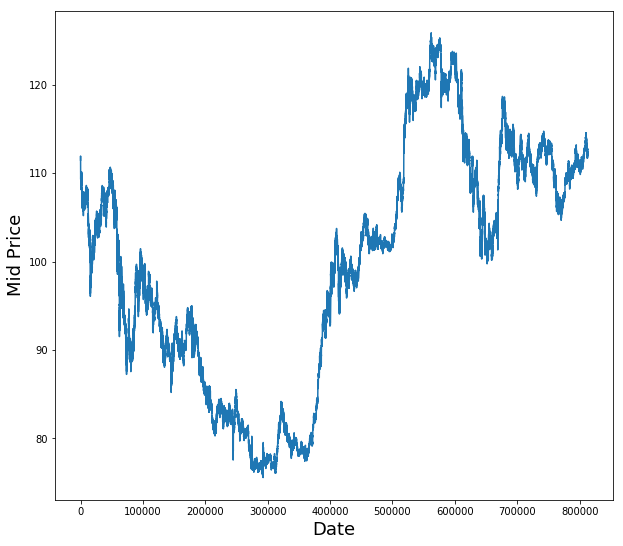

In [10]:
plt.figure(figsize = (10,9))
plt.plot(range(df.shape[0]),df['High'])
#plt.plot(range(df.shape[0]),(df['Low']))
#plt.plot(range(df.shape[0]),(df['High']))
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [11]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
train_data = high_prices[round(len(high_prices)-len(mid_prices)*.8):]
test_data = high_prices[:round(len(high_prices)-len(mid_prices)*.8)]

In [13]:
print(len(train_data), len(test_data))

650492 162623


In [14]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [15]:
train_data

array([[ 91.9375],
       [ 91.9285],
       [ 91.9565],
       ...,
       [112.6725],
       [112.646 ],
       [112.642 ]])

In [16]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [17]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [18]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [19]:
len(df)

813115

In [20]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.7f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.0000554


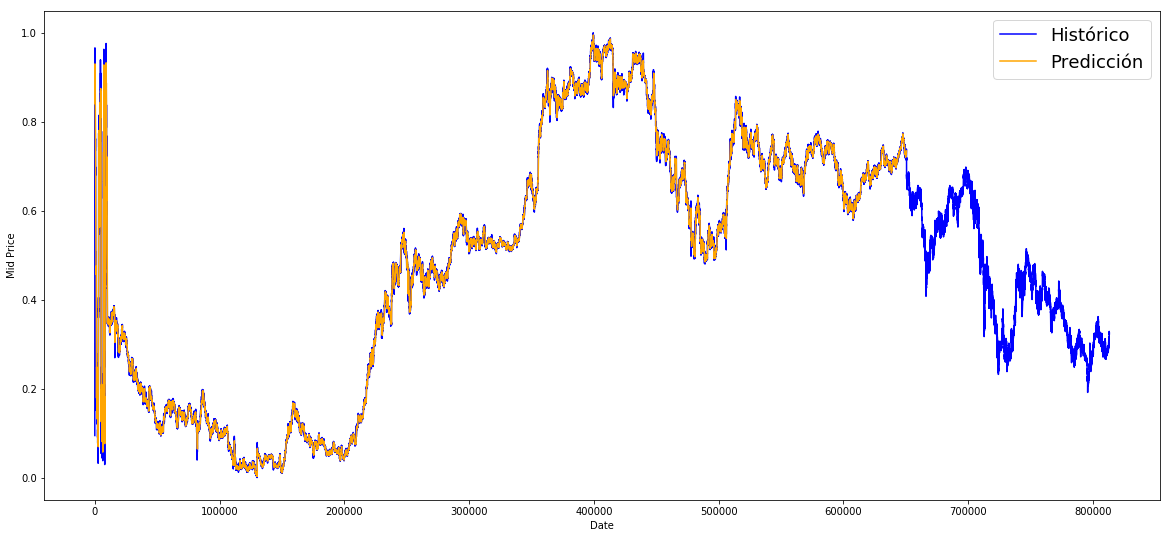

In [21]:
plt.figure(figsize = (20,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='Histórico')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Predicción')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [22]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.7f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.0000007


In [23]:
train_data

array([0.09452457, 0.1793563 , 0.25645272, ..., 0.7377605 , 0.73723353,
       0.73715399])

In [24]:
running_mean

0.737490641557866

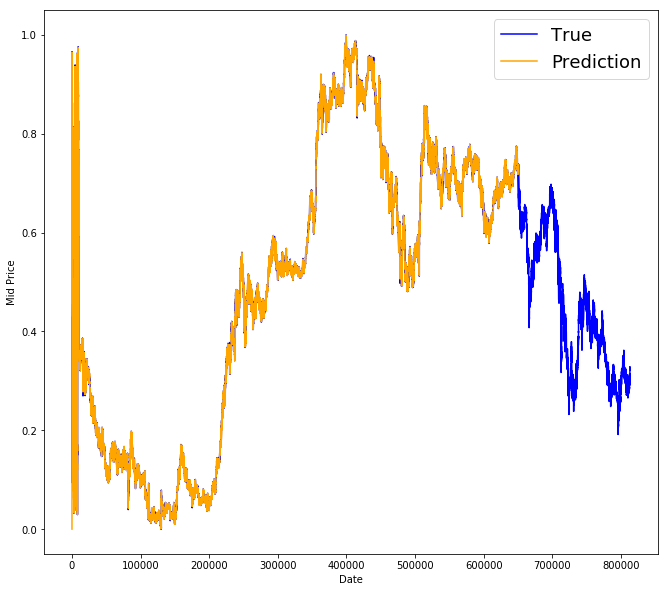

In [25]:
plt.figure(figsize = (11,10))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [26]:
min_window = 5
step = int(60/min_window)

high_bid = ['High' + str(min_window*(i+1)) for i in range(step)]

shifts = list(range(1,step+1))

for hb in zip(high_bid):
    df[hb] = df['High'].shift(step)

/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
bt = pd.DataFrame()
for actual,response in zip(Actuals, Responses):
    df = DF.copy()
    df[response] = df[actual].shift(-1)
    X_train, X_test, y_train, y_test = train_test(df, response, train_size=0.75, time_series=True, scaling=None)
    if intercept:
        X_train = sm.add_constant(X_train, prepend=True, has_constant='skip')
        X_test = sm.add_constant(X_test, prepend=True, has_constant='skip')
    mod = models['{}_{}'.format(model, actual)]
    bt['Expected ' + actual] = y_test
    bt['Predicted ' + actual] = mod.predict(X_test)

In [27]:
df.head()

Date     Open    Close     High      Low  (High5,)  (High10,)  \
0  2008-01-02 06:50  111.450  111.450  111.465  111.440       NaN        NaN   
1  2008-01-02 06:55  111.455  111.450  111.485  111.446       NaN        NaN   
2  2008-01-02 07:00  111.450  111.475  111.475  111.440       NaN        NaN   
3  2008-01-02 07:05  111.471  111.532  111.542  111.465       NaN        NaN   
4  2008-01-02 07:10  111.527  111.585  111.585  111.520       NaN        NaN   

   (High15,)  (High20,)  (High25,)  (High30,)  (High35,)  (High40,)  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

   (High45,)  (High50,)  (High55,)  (High60,)  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN

In [37]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,500,500)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.09452457 0.17769915 0.12617679 0.7139861  0.20379859 0.11583686
 0.15444629 0.86771685 0.3583587  0.34917873 0.3482839  0.36915368
 0.3828448  0.34571865 0.33585548 0.29650214 0.3131065  0.3281797
 0.31344455 0.31406102 0.28924397 0.2581431  0.23788975 0.2616628
 0.23013443 0.23863547 0.21501154 0.20459156 0.19436048 0.19684617
 0.17466393 0.17035873 0.1711442  0.16752505 0.20212576 0.1751213
 0.15863626 0.13719973 0.12351853 0.11572343 0.11446071 0.09951679
 0.1112492  0.1381244  0.15530545 0.15862632 0.17100501 0.1639059
 0.15563355 0.16146994 0.14453746 0.11121938 0.15844734 0.14488547
 0.12996142 0.13298401 0.11615097 0.13240734 0.15693605 0.14910118
 0.1276547  0.13705058 0.1428472  0.10735165 0.10879335 0.12322025
 0.16978206 0.18491489 0.15517619 0.12529828 0.13117443 0.10832604
 0.10327514 0.10768971 0.12346882 0.10477649 0.10144567 0.09523147
 0.10683464 0.09254693 0.11090121 0.10788856 0.09649419 0.07033487
 0.05891068 0.04397669 0.06365336 0.0

	Inputs:  [0.8552129  0.15584414 0.09888263 0.76850426 0.12893891 0.12504333
 0.18723087 0.8546497  0.35343403 0.34098592 0.34637487 0.36936247
 0.37837058 0.34490335 0.3360742  0.29571667 0.31491607 0.3284382
 0.31837615 0.31346443 0.28408366 0.25983337 0.23622932 0.25929645
 0.22375119 0.24060412 0.21278436 0.20409441 0.1941318  0.19631921
 0.17953588 0.16924515 0.16977212 0.16134068 0.2020661  0.17422646
 0.15827832 0.13769686 0.1228126  0.11560412 0.11591235 0.10297685
 0.11061287 0.13770682 0.15347598 0.16054526 0.17069678 0.16585468
 0.16232501 0.16122137 0.14620784 0.11529589 0.15259108 0.14370227
 0.13080655 0.13654351 0.11689667 0.13264596 0.15456969 0.15101019
 0.1258849  0.13569838 0.14473632 0.10348393 0.10745108 0.11957127
 0.16856904 0.18336383 0.15565343 0.12203707 0.1285595  0.11121938
 0.10446826 0.11126909 0.12456252 0.10374244 0.09967586 0.09370029
 0.10693406 0.0913538  0.10992682 0.10896238 0.09667316 0.07085189
 0.05771755 0.04370824 0.07192571 0.01956729 0.024319

 0.7635917  0.7616529 ]

	Output: [0.9293284  0.19194676 0.09125454 0.7763693  0.12005487 0.10776525
 0.15780981 0.8666851  0.3512847  0.34038937 0.34653395 0.36641943
 0.38248688 0.34127426 0.34492323 0.29631323 0.31501552 0.32151806
 0.31636772 0.30849308 0.28560492 0.26068842 0.23703468 0.25868002
 0.22393017 0.23984848 0.21855114 0.2072562  0.19687599 0.19931196
 0.17872056 0.1712337  0.16549674 0.16030663 0.20148942 0.17392817
 0.15770164 0.1358873  0.12457246 0.11291958 0.11692651 0.09919862
 0.10997654 0.13848235 0.15299873 0.15997852 0.16970252 0.16726655
 0.16063474 0.1624642  0.14429884 0.11358575 0.14986677 0.14292674
 0.13125397 0.13862154 0.11978006 0.12946428 0.15334672 0.15026447
 0.12308105 0.13583757 0.14521357 0.10221127 0.10653635 0.12186804
 0.16918549 0.18783805 0.149827   0.12307111 0.12488069 0.10980751
 0.10500517 0.11709553 0.12386653 0.10588013 0.09187082 0.09437639
 0.10377228 0.0899817  0.10963848 0.11077195 0.09506244 0.06890312
 0.05687242 0.04329064 0.077

 0.7639298  0.7603504 ]


Unrolled index 69
	Inputs:  [0.920493   0.1910195  0.04511357 0.85752094 0.13130474 0.14512147
 0.13096793 0.902624   0.3513041  0.34229836 0.34704104 0.3645502
 0.38497257 0.33969337 0.3414433  0.29589564 0.31809777 0.31921133
 0.31861478 0.30010143 0.2842527  0.26178214 0.2389238  0.2558165
 0.22351258 0.23990813 0.21696031 0.20910555 0.20646079 0.20257318
 0.17686129 0.17062719 0.16615295 0.16052537 0.2010917  0.1755389
 0.15684657 0.13427657 0.12256403 0.111806   0.1173441  0.09931793
 0.11172646 0.13784601 0.15411231 0.1593223  0.16926503 0.1660237
 0.16440304 0.16210626 0.1448258  0.11304884 0.14678451 0.14097796
 0.1316318  0.13305362 0.11693645 0.13089603 0.1535257  0.14972757
 0.1245824  0.13639437 0.14562123 0.10151527 0.10724229 0.12226575
 0.16735603 0.18569042 0.1526905  0.12434378 0.1229518  0.10515431
 0.10675509 0.11842786 0.12386653 0.10454781 0.09926821 0.09457525
 0.10080934 0.08953428 0.10870387 0.11136851 0.0927955  0.06902243
 0.05539095 

	Output: [0.92638326 0.24048904 0.0672959  0.8253691  0.14946136 0.14116943
 0.13034338 0.89204466 0.34955353 0.33891782 0.35298678 0.36443087
 0.37489063 0.34398863 0.34303412 0.2903476  0.31624842 0.32419264
 0.31718302 0.30282572 0.28566456 0.25893852 0.24006721 0.25585628
 0.22146437 0.23382318 0.2160754  0.20978166 0.20638125 0.20114143
 0.17940661 0.17392817 0.1644627  0.16264318 0.20113148 0.17262568
 0.15686645 0.13813435 0.11534561 0.11280027 0.11636971 0.10078945
 0.11105035 0.1416143  0.15719455 0.1602967  0.1686287  0.17276487
 0.16547686 0.1613705  0.1435233  0.11497772 0.14835547 0.13867125
 0.14664532 0.13250676 0.1185074  0.13089603 0.15417197 0.1502446
 0.12334951 0.13503222 0.14652601 0.09499284 0.10858455 0.12019766
 0.16540726 0.1905723  0.15260102 0.12519886 0.12169901 0.10008352
 0.10584036 0.12183821 0.12631243 0.10442849 0.09423719 0.091145
 0.10184338 0.0948437  0.10846524 0.11083161 0.09328269 0.06866449
 0.05729995 0.04098393 0.08838093 0.02387249 0.02289811 

 0.76422805 0.75146157]

	Output: [0.94936293 0.24841996 0.07508437 0.8129747  0.1336058  0.12355753
 0.05189784 0.88864577 0.3492269  0.34862193 0.35712296 0.36816934
 0.3701181  0.34015074 0.3419603  0.29031777 0.3181972  0.32176661
 0.31835628 0.30489382 0.28445154 0.2582624  0.23787981 0.25653237
 0.22139476 0.23113865 0.2125159  0.20906578 0.2056256  0.20530742
 0.18088809 0.1779848  0.16153954 0.15939191 0.2005548  0.17370944
 0.15221325 0.135589   0.11361557 0.11257159 0.11697622 0.10226098
 0.11240256 0.14292674 0.1575525  0.16306077 0.16893692 0.16974229
 0.16410476 0.16065463 0.14158447 0.11636971 0.15295896 0.1377764
 0.14682429 0.1315125  0.11851734 0.12513919 0.15630965 0.15136813
 0.12263363 0.13535038 0.14635698 0.088888   0.10765988 0.12254415
 0.16727649 0.18174316 0.14919066 0.12593462 0.12078428 0.10032214
 0.10586025 0.12150016 0.12794305 0.10506482 0.09346166 0.09047884
 0.10194281 0.09455536 0.1093402  0.10901209 0.09437639 0.06776965
 0.05679287 0.03882636 0.0783

 0.76401925 0.75229675]


Unrolled index 143
	Inputs:  [0.91377014 0.25384295 0.05997924 0.80863357 0.2096165  0.11381758
 0.07108508 0.86504406 0.34946096 0.33865932 0.3557807  0.36709553
 0.3649678  0.34229836 0.33850023 0.28912464 0.31704384 0.32468978
 0.32000676 0.30669343 0.28379533 0.25983337 0.2377605  0.25518015
 0.225173   0.22972678 0.21590638 0.20846921 0.20543669 0.20363705
 0.18251869 0.1751213  0.16307071 0.15504692 0.20188713 0.17312281
 0.15139794 0.13651368 0.11369511 0.11092109 0.12059537 0.10504494
 0.11160714 0.14227052 0.158507   0.16429366 0.1704681  0.1690264
 0.16523823 0.16210626 0.13886017 0.11666799 0.15238228 0.14287703
 0.14931992 0.13103524 0.11653873 0.12667038 0.1532473  0.14991648
 0.12114222 0.1344953  0.15073179 0.08654152 0.10635738 0.12670021
 0.1693048  0.183334   0.15020482 0.12448297 0.12156976 0.10026249
 0.10544265 0.11594217 0.1290268  0.10462735 0.09256682 0.09144329
 0.10485603 0.09613626 0.10918111 0.11078189 0.09239779 0.0692014
 0.058980

 7.30522215e-01 7.42085576e-01 7.63293445e-01 7.47484505e-01]

	Output: [8.53831708e-01 2.49742955e-01 2.91681230e-01 7.95240045e-01
 2.02525362e-01 1.54648215e-01 5.52415103e-02 8.63215685e-01
 3.51348311e-01 3.37605387e-01 3.55263680e-01 3.67433578e-01
 3.63267571e-01 3.42875034e-01 3.32176656e-01 2.86420226e-01
 3.16407502e-01 3.11853737e-01 3.14786822e-01 3.04893821e-01
 2.78247297e-01 2.56194323e-01 2.35274822e-01 2.55021065e-01
 2.29468256e-01 2.30502307e-01 2.21474305e-01 1.93793744e-01
 2.10358337e-01 1.99003741e-01 1.79466277e-01 1.71482265e-01
 1.63289458e-01 1.56001434e-01 2.03318879e-01 1.74027607e-01
 1.54937565e-01 1.35668546e-01 1.10851496e-01 1.09608658e-01
 1.22136496e-01 1.02469772e-01 1.10791840e-01 1.45472080e-01
 1.57602206e-01 1.63140312e-01 1.72357216e-01 1.68270767e-01
 1.66858897e-01 1.65069208e-01 1.37070477e-01 1.20147951e-01
 1.49677858e-01 1.45889670e-01 1.48464844e-01 1.31492600e-01
 1.17851175e-01 1.35996655e-01 1.53704658e-01 1.50930643e-01
 1.21400729e-

 0.7635122  0.74154866]


Unrolled index 202
	Inputs:  [0.82569045 0.2542672  0.3050588  0.76369905 0.21275088 0.16304773
 0.17053807 0.804529   0.3497146  0.32764277 0.3560591  0.36775175
 0.36435133 0.34394884 0.33359846 0.28272152 0.3116151  0.3117543
 0.319788   0.30499324 0.2737134  0.2552597  0.22999522 0.25742722
 0.22692293 0.23203349 0.21912782 0.19059218 0.20819081 0.19285913
 0.1840101  0.16893692 0.16453229 0.15630965 0.20296094 0.17277482
 0.15398306 0.13682191 0.11292952 0.11014556 0.12287226 0.10402084
 0.1102947  0.14529312 0.15562361 0.16638164 0.16666998 0.16395561
 0.16791283 0.16271277 0.13685173 0.11898465 0.14712258 0.14383154
 0.14676464 0.14666522 0.11802021 0.13500239 0.15867603 0.1515272
 0.12195753 0.13835308 0.14514397 0.07232342 0.10406061 0.13576798
 0.17537981 0.18148465 0.14949888 0.12481109 0.11866648 0.09933782
 0.10458758 0.11684696 0.12502983 0.10508471 0.0925171  0.091145
 0.10185333 0.09671293 0.10924077 0.1102251  0.09069758 0.07003659
 0.05569917

 0.75894845 0.7471464 ]

	Output: [0.86781037 0.23117657 0.32216632 0.7478379  0.19887064 0.1665087
 0.1524071  0.8348922  0.35360125 0.32959154 0.35434896 0.36979994
 0.36335707 0.35094854 0.32676783 0.2825823  0.30856267 0.31288776
 0.31986755 0.3027263  0.27470767 0.25577673 0.23287863 0.26112592
 0.22413896 0.22523266 0.21916759 0.19456927 0.20858853 0.19335626
 0.18222041 0.16754495 0.16388601 0.153993   0.20280187 0.17215836
 0.15535516 0.13441576 0.11931276 0.109897   0.12386653 0.10176384
 0.10802776 0.1509207  0.158507   0.16370705 0.163369   0.16251393
 0.16593422 0.16395561 0.13116449 0.12125159 0.15008551 0.14601894
 0.14843501 0.14303611 0.122395   0.13439588 0.15907374 0.1511096
 0.12113228 0.14318526 0.14621778 0.06957922 0.10587019 0.13648385
 0.17441536 0.18330416 0.15027443 0.12672009 0.1190443  0.09818446
 0.11072224 0.11656857 0.12451281 0.10646675 0.09355114 0.09172168
 0.10068008 0.09641465 0.10559179 0.11031459 0.07818963 0.07007636
 0.05646476 0.03215479 0.07151

	Output: [0.8873376  0.21694322 0.31282786 0.7689707  0.17332858 0.18992598
 0.15408586 0.8374077  0.3551945  0.3259028  0.35530347 0.36868638
 0.36582285 0.34784642 0.3208519  0.27512527 0.3117742  0.31676543
 0.32075247 0.30346206 0.274827   0.25098434 0.23172526 0.26671374
 0.22397988 0.22514318 0.22232938 0.19654788 0.20922486 0.19538459
 0.18327434 0.18008272 0.16209632 0.15433106 0.20198655 0.1715618
 0.1525016  0.13544981 0.11736398 0.11240256 0.1215797  0.1007994
 0.10502505 0.14541243 0.15793031 0.1654172  0.16506921 0.16428372
 0.1671373  0.16365734 0.12808225 0.12287226 0.15157692 0.14757994
 0.14688395 0.14790805 0.1209036  0.13483337 0.15907374 0.15034401
 0.12200724 0.13569838 0.14600898 0.07573377 0.10764994 0.13718979
 0.17422646 0.18008272 0.15015511 0.12636216 0.11778158 0.09749841
 0.1109907  0.11858694 0.12679963 0.106944   0.09325286 0.09220888
 0.09995426 0.09884068 0.10603921 0.10534322 0.08268374 0.06949968
 0.0561466  0.03179685 0.06805798 0.02196349 0.01904033

	Inputs:  [0.86737525 0.1553684  0.36597693 0.7946512  0.08711898 0.21098901
 0.28265828 0.77079207 0.35721675 0.32870665 0.35574093 0.3679208
 0.35508472 0.34715042 0.32846802 0.27753142 0.30792636 0.3242026
 0.32419264 0.3017519  0.27896318 0.2542853  0.23178492 0.26480472
 0.22757915 0.22698258 0.22262767 0.1950167  0.20298083 0.19531499
 0.18142499 0.17715956 0.15732381 0.15143771 0.20093262 0.17219813
 0.15319759 0.13564867 0.11782135 0.11100063 0.12158965 0.10148545
 0.10637727 0.14427896 0.15671732 0.17122374 0.16445275 0.16448258
 0.17228763 0.16294146 0.13082644 0.1224646  0.15191497 0.1451241
 0.14402044 0.14583996 0.1193923  0.13701081 0.16419424 0.15009545
 0.12143056 0.1348433  0.1442889  0.071528   0.10760022 0.136633
 0.17397788 0.1799833  0.15069202 0.12608376 0.12019766 0.09423719
 0.10481626 0.11421214 0.12331968 0.10696389 0.09478404 0.09364063
 0.10105791 0.10043152 0.10540288 0.10516425 0.08476177 0.06914175
 0.05645482 0.03024578 0.06110802 0.02142658 0.01851336 0

	Inputs:  [0.87121844 0.13049437 0.36343312 0.8018982  0.10291277 0.20818573
 0.26268658 0.76073104 0.35441017 0.32698655 0.3631582  0.3686466
 0.35898226 0.3506105  0.32868677 0.28152838 0.30927855 0.3281399
 0.3211104  0.3009565  0.27781975 0.25671133 0.23649777 0.26697224
 0.22815582 0.22619711 0.22032095 0.19418152 0.20260301 0.19425112
 0.1798938  0.17694081 0.15698576 0.15006562 0.1994611  0.17289414
 0.15295896 0.13766704 0.11760261 0.11098075 0.11923321 0.10102808
 0.10281777 0.14718223 0.155902   0.16997097 0.16297129 0.16720688
 0.17415686 0.16270283 0.1320991  0.12606387 0.1521337  0.14464684
 0.14364262 0.14719218 0.11922327 0.13561884 0.16311048 0.15076162
 0.12194758 0.1344456  0.14407015 0.06697423 0.10535317 0.13717985
 0.17363983 0.17916799 0.1475501  0.12672009 0.11868636 0.08737671
 0.10672526 0.11049356 0.12888761 0.10759028 0.0936108  0.09429685
 0.10073974 0.10236041 0.1035237  0.10647669 0.08024777 0.06937043
 0.05367086 0.02764079 0.05871182 0.02029311 0.0195474

	Output: [0.8677407  0.13852122 0.3619344  0.8365461  0.12183738 0.32094884
 0.26040915 0.70965534 0.35239086 0.32949212 0.37019765 0.3668569
 0.36182588 0.3499642  0.32964125 0.28377545 0.30729994 0.32511732
 0.32239303 0.30034003 0.2788041  0.25516027 0.24188673 0.2666143
 0.23219258 0.2262667  0.22342308 0.19612035 0.20475064 0.19275971
 0.17911828 0.17618518 0.16130091 0.14905146 0.19934179 0.1721186
 0.15453985 0.13507198 0.1175529  0.11115972 0.122395   0.10125676
 0.10102808 0.15136813 0.1567372  0.16849944 0.16189747 0.16887727
 0.1740972  0.16105233 0.13532056 0.1293052  0.15068208 0.14568087
 0.14463688 0.14446786 0.12029709 0.13927776 0.16305083 0.15163657
 0.12236518 0.13380925 0.14412981 0.05878142 0.10463729 0.14523345
 0.17439549 0.1809378  0.14648624 0.12649141 0.11867642 0.08385698
 0.1083161  0.10993677 0.13048838 0.10581053 0.09172168 0.09445594
 0.1006602  0.10108773 0.10315582 0.10749085 0.07865693 0.07040447
 0.05040964 0.02354438 0.06033248 0.02435969 0.02041242 

 0.7599924  0.74768335]


Unrolled index 351
	Inputs:  [0.85727376 0.1323471  0.3748542  0.79603875 0.14508563 0.4058128
 0.25796044 0.7136597  0.35208502 0.32875636 0.37013802 0.36856705
 0.36502743 0.35157493 0.3171333  0.28824967 0.31143612 0.3275036
 0.32477927 0.30173203 0.27846605 0.25382796 0.24148902 0.26504335
 0.23316696 0.22600819 0.21467347 0.19548401 0.20536709 0.19610046
 0.17786549 0.17565821 0.16326956 0.149827   0.19882476 0.17112432
 0.15692611 0.12539771 0.12001869 0.10877346 0.12217627 0.10159481
 0.10120705 0.15063235 0.15689628 0.16893692 0.16201678 0.16650096
 0.17417674 0.16011772 0.13695116 0.13097557 0.14765948 0.14631721
 0.14376193 0.1453627  0.12059537 0.1390789  0.16388601 0.1497574
 0.1236975  0.13400811 0.15355553 0.06601973 0.10600939 0.14789811
 0.17354041 0.17980433 0.14650613 0.12613347 0.11937241 0.08590519
 0.11148783 0.11083161 0.13048838 0.10462735 0.08911669 0.09445594
 0.09978524 0.09722996 0.10155504 0.10727211 0.07849785 0.07058344
 0.0536708

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





	Output: [0.73496765 0.20650691 0.7715144  0.84048164 0.10148114 0.75104976
 0.4231185  0.64208317 0.34029633 0.3312818  0.37252426 0.36924314
 0.3141803  0.34776688 0.32107064 0.29065582 0.31197304 0.31921133
 0.3253162  0.29978326 0.2772729  0.23945077 0.25044742 0.25320154
 0.23145682 0.24507836 0.21544902 0.20148942 0.20433304 0.19942133
 0.17617524 0.17110443 0.16489023 0.19199412 0.19291879 0.17239699
 0.15440065 0.1247912  0.11067253 0.11420219 0.11393374 0.1135758
 0.12280266 0.15377426 0.15383391 0.17011017 0.14278755 0.16179805
 0.16886732 0.15888482 0.13267578 0.12374721 0.15053293 0.13753778
 0.14114699 0.14091831 0.12097319 0.13517141 0.16128102 0.15047327
 0.12452275 0.13320275 0.12652124 0.11279033 0.10646675 0.14546214
 0.19059218 0.17331173 0.13931753 0.1323974  0.11286987 0.09729955
 0.10636733 0.12172884 0.12745586 0.12100302 0.0912146  0.09567889
 0.08966354 0.09776686 0.09594734 0.10690423 0.07876631 0.06693446
 0.05457564 0.0390451  0.05752863 0.02569201 0.02130

In [38]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 5000 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

In [39]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [40]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

In [41]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
    c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

In [42]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
    for ui in range(num_unrollings):
        loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [43]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
    sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
    sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [45]:
epochs = 10
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0

loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
pbar_epochs = tqdm(total=epochs)
for ep in range(epochs):
    pbar = tqdm(total=train_seq_length//batch_size)
    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):
        
        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l
        pbar.update(1)
    pbar.close()
    # ============================ Validation ==============================
    
    if (ep+1) % valid_summary == 0:
        
        average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
        if (ep+1)%valid_summary==0:
            print('Average loss at step %d: %f' % (ep+1, average_loss))
        
        train_mse_ot.append(average_loss)

        average_loss = 0 # reset loss

        predictions_seq = []

        mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
        for w_i in test_points_seq:
            mse_test_loss = 0.0
            our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
            current_price = all_mid_data[tr_i]
            feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
            _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):
            
            pred = session.run(sample_prediction,feed_dict=feed_dict)

            our_predictions.append(np.asscalar(pred))

            feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

        if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

        mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
            x_axis_seq.append(x_axis)
        pbar.update(1)

    current_test_mse = np.mean(mse_test_loss_seq)
    pbar.close()
      # Learning rate decay logic
    if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
        loss_nondecrease_count += 1
    else:
        loss_nondecrease_count = 0

    if loss_nondecrease_count > loss_nondecrease_threshold :
        session.run(inc_gstep)
        loss_nondecrease_count = 0
        print('\tDecreasing learning rate by 0.5')

    test_mse_ot.append(current_test_mse)
    print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
    predictions_over_time.append(predictions_seq)
    print('\tFinished Predictions')
    pbar_epochs.update(1)
pbar_epochs.close()

/Users/estebandiaz/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized


KeyboardInterrupt: 

In [ ]:
best_prediction_epoch = 28 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)
plt.show()